# 실습 1

## CCTV 증가율 계산

### 데이터 전처리

- 데이터 확인

In [ ]:
import pandas as pd

In [ ]:
cctv_seoul = pd.read_csv('./../data/Seoul_CCTV.csv', encoding='utf-8', index_col=0)
cctv_seoul.reset_index(drop=True, inplace=True)
cctv_seoul.drop([0], inplace=True)
cctv_seoul.head()

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,종로구,2031,549.0,158.0,128,143,142,67,237,82,225,300
2,중 구,2718,275.0,236.0,239,372,386,155,364,419,137,135
3,용산구,3258,88.0,38.0,295,491,147,335,473,486,500,405
4,성동구,4409,190.0,352.0,278,939,457,640,483,366,233,471
5,광진구,3828,309.0,95.0,42,666,460,712,191,740,273,340


In [ ]:
# 데이터 오름차순, CCTV를 가장 적게 가진 지역 확인
cctv_seoul.sort_values(by='총계', ascending=True).head(5)

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,종로구,2031,549.0,158.0,128,143,142,67,237,82,225,300
10,도봉구,2378,3.0,NaN,68,80,152,149,156,552,557,661
2,중 구,2718,275.0,236.0,239,372,386,155,364,419,137,135
11,노원구,3006,156.0,466.0,310,162,208,311,382,213,161,637
20,동작구,3024,534.0,124.0,245,270,299,312,433,28,372,407


In [ ]:
# 데이터 내림차순, CCTV를 가장 많이 가진 지역 확인
cctv_seoul.sort_values(by='총계', ascending=False).head(5)

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
23,강남구,7721,672.0,814.0,1280,981,735,787,913,505,588,446
21,관악구,5772,774.0,447.0,607,675,663,889,404,549,135,629
22,서초구,5395,227.0,552.0,514,1022,422,339,419,565,878,457
12,은평구,5027,524.0,317.0,493,361,579,979,386,520,481,387
17,구로구,5003,406.0,248.0,340,543,531,781,652,685,339,478


- 구역별 최근 증가율 계산 
  - (2023년 + 2022년 + 2021년) / 전체 합계 * 100 

- 하지만, Nan 값 때문에 이상하게 계산됨. --> 전처리 필요

In [ ]:
cctv_seoul['최근증가율'] = (
    (cctv_seoul['2023년'] + cctv_seoul['2022년'] + cctv_seoul['2021년'])/
     cctv_seoul.iloc[:, 2:10].sum(axis=1) * 100
)

cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율
10,도봉구,2378,3.0,NaN,68,80,152,149,156,552,557,661,152.586207
18,금천구,3169,NaN,92.0,130,196,539,366,514,207,304,821,65.166341
3,용산구,3258,88.0,38.0,295,491,147,335,473,486,500,405,59.116022
15,양천구,4447,4.0,216.0,418,566,827,321,352,347,386,1010,57.128810
24,송파구,4031,223.0,183.0,126,227,526,1050,237,151,431,877,53.580610


- 데이터 타입 확인

In [ ]:
cctv_seoul.iloc[:, 2:10].dtypes

2015년 이전 설치된 CCTV    float64
2015년                float64
2016년                  int64
2017년                  int64
2018년                  int64
2019년                  int64
2020년                  int64
2021년                  int64
dtype: object

In [ ]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   구분                 25 non-null     object 
 1   총계                 25 non-null     int64  
 2   2015년 이전 설치된 CCTV  24 non-null     float64
 3   2015년              24 non-null     float64
 4   2016년              25 non-null     int64  
 5   2017년              25 non-null     int64  
 6   2018년              25 non-null     int64  
 7   2019년              25 non-null     int64  
 8   2020년              25 non-null     int64  
 9   2021년              25 non-null     int64  
 10  2022년              25 non-null     int64  
 11  2023년              25 non-null     int64  
 12  최근증가율              25 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 2.7+ KB


- 총계 부분 int 형으로 전환 (필요시)

In [ ]:
cctv_seoul = cctv_seoul.astype(dtype={'총계':'int'},
                               errors='raise',
                               copy=True)
cctv_seoul

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율
1,종로구,2031,549.0,158.0,128,143,142,67,237,82,225,300,40.305445
2,중 구,2718,275.0,236.0,239,372,386,155,364,419,137,135,28.250204
3,용산구,3258,88.0,38.0,295,491,147,335,473,486,500,405,59.116022
4,성동구,4409,190.0,352.0,278,939,457,640,483,366,233,471,28.879892
5,광진구,3828,309.0,95.0,42,666,460,712,191,740,273,340,42.083981
6,동대문구,3268,8.0,70.0,749,670,199,215,229,226,317,585,47.675402
7,중랑구,4512,334.0,145.0,153,170,215,1074,976,507,294,644,40.430890
8,성북구,4578,281.0,294.0,572,448,850,713,226,418,355,421,31.404524
9,강북구,3331,37.0,68.0,210,4,375,963,569,298,797,10,43.779715
10,도봉구,2378,3.0,NaN,68,80,152,149,156,552,557,661,152.586207


- int 형으로 전환하기 위해서는 데이터 형태가 숫자 형태로 이뤄저야함. 
  - ',' 삭제


(데이터가 정상적으로 입력되어 있어서 해당 코드를 실행하면 오류가 발생하여 주석처리함)

In [ ]:
# cctv_seoul['총계'] = cctv_seoul['총계'].str.replace(',','')
# cctv_seoul

In [ ]:
# convert_col_name = cctv_seoul.columns[2:-1].tolist()

# for name in convert_col_name:
#     cctv_seoul[name] = cctv_seoul[name].str.replace(',','')
# cctv_seoul

- fillna(Value)
  - Nan 값을 특정 Value 값으로 대체

In [ ]:
cctv_seoul = cctv_seoul.fillna(0)
cctv_seoul

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율
1,종로구,2031,549.0,158.0,128,143,142,67,237,82,225,300,40.305445
2,중 구,2718,275.0,236.0,239,372,386,155,364,419,137,135,28.250204
3,용산구,3258,88.0,38.0,295,491,147,335,473,486,500,405,59.116022
4,성동구,4409,190.0,352.0,278,939,457,640,483,366,233,471,28.879892
5,광진구,3828,309.0,95.0,42,666,460,712,191,740,273,340,42.083981
6,동대문구,3268,8.0,70.0,749,670,199,215,229,226,317,585,47.675402
7,중랑구,4512,334.0,145.0,153,170,215,1074,976,507,294,644,40.430890
8,성북구,4578,281.0,294.0,572,448,850,713,226,418,355,421,31.404524
9,강북구,3331,37.0,68.0,210,4,375,963,569,298,797,10,43.779715
10,도봉구,2378,3.0,0.0,68,80,152,149,156,552,557,661,152.586207


- 모든 컬럼의 데이터 타입을 int형으로 변환

In [ ]:
convert_col_name = cctv_seoul.columns[2:-1].tolist()

cctv_seoul = cctv_seoul.astype(dtype=dict(zip(convert_col_name, 
                                              ['int' for _ in range(len(convert_col_name))])),
                               errors='raise',
                               copy=True)

cctv_seoul.dtypes

구분                    object
총계                     int64
2015년 이전 설치된 CCTV      int64
2015년                  int64
2016년                  int64
2017년                  int64
2018년                  int64
2019년                  int64
2020년                  int64
2021년                  int64
2022년                  int64
2023년                  int64
최근증가율                float64
dtype: object

### 증가율 계산

In [ ]:
cctv_seoul['2020년 이전'] = cctv_seoul.iloc[:, 2:9].sum(axis=1)
cctv_seoul.head()

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율,2020년 이전
1,종로구,2031,549,158,128,143,142,67,237,82,225,300,40.305445,1424
2,중 구,2718,275,236,239,372,386,155,364,419,137,135,28.250204,2027
3,용산구,3258,88,38,295,491,147,335,473,486,500,405,59.116022,1867
4,성동구,4409,190,352,278,939,457,640,483,366,233,471,28.879892,3339
5,광진구,3828,309,95,42,666,460,712,191,740,273,340,42.083981,2475


In [ ]:
cctv_seoul['최근증가율'] = (
    (cctv_seoul['2023년'] + cctv_seoul['2022년'] + cctv_seoul['2021년'])/
    cctv_seoul['2020년 이전'] * 100
)
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율,2020년 이전
10,도봉구,2378,3,0,68,80,152,149,156,552,557,661,291.118421,608
3,용산구,3258,88,38,295,491,147,335,473,486,500,405,74.504553,1867
18,금천구,3169,0,92,130,196,539,366,514,207,304,821,72.509526,1837
16,강서구,3546,303,192,167,416,259,457,362,441,596,353,64.471243,2156
15,양천구,4447,4,216,418,566,827,321,352,347,386,1010,64.460059,2704


## 인구현황 데이터

### 데이터 전처리

In [ ]:
pop_seoul = pd.read_excel("./../data/Seoul_Population.xlsx", 
                            header=2, usecols='B,D,G,J,N')

pop_seoul.head()

/home/sangbeom/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(2),소계.1,소계.2,소계.3,소계.5
0,소계,9638799,9386034,252765,1743696
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462


In [ ]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구분',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자',},
                          inplace=True)
pop_seoul.head()

,구분,인구수,한국인,외국인,고령자
0,소계,9638799,9386034,252765,1743696
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462


- 데이터 전처리 시 오류를 줄이기 위한 데이터 타입 확인

In [ ]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      26 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


- 필요없는 인덱스 제거
  - 총계는 포함하지 않음

In [ ]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구분,인구수,한국인,외국인,고령자
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462
5,광진구,351180,335554,15626,56819


- CCVT 증가율과 가장 관련있는 데이터 비율 계산 정도? 

In [ ]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,150453,139417,11036,28764,7.335181,19.118263
2,중구,131793,121312,10481,25920,7.952623,19.667205
3,용산구,227106,213151,13955,39747,6.144708,17.501519
4,성동구,284766,277361,7405,49462,2.600381,17.369349
5,광진구,351180,335554,15626,56819,4.449570,16.179452


In [ ]:
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,660025,654166,5859,108894,0.887694,16.498466
16,강서구,568826,563058,5768,102096,1.014018,17.948547
23,강남구,550282,544873,5409,86606,0.982951,15.738476
11,노원구,502925,498213,4712,96422,0.936919,19.172242
21,관악구,497883,481956,15927,85418,3.198944,17.156240


In [ ]:
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,415651,392405,23246,79984,5.592673,19.243067
19,영등포구,397800,374794,23006,67509,5.783308,16.970588
6,동대문구,359873,341149,18724,67030,5.202947,18.626015
21,관악구,497883,481956,15927,85418,3.198944,17.156240
5,광진구,351180,335554,15626,56819,4.449570,16.179452


In [ ]:
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,660025,654166,5859,108894,0.887694,16.498466
16,강서구,568826,563058,5768,102096,1.014018,17.948547
11,노원구,502925,498213,4712,96422,0.936919,19.172242
12,은평구,470869,466770,4099,93817,0.870518,19.924225
23,강남구,550282,544873,5409,86606,0.982951,15.738476


In [ ]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,131793,121312,10481,25920,7.952623,19.667205
1,종로구,150453,139417,11036,28764,7.335181,19.118263
3,용산구,227106,213151,13955,39747,6.144708,17.501519
19,영등포구,397800,374794,23006,67509,5.783308,16.970588
18,금천구,241105,227481,13624,45342,5.650650,18.805914


In [ ]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,292977,288113,4864,68617,1.660199,23.420610
10,도봉구,309494,306948,2546,70436,0.822633,22.758438
7,중랑구,387470,382155,5315,78955,1.371719,20.377061
12,은평구,470869,466770,4099,93817,0.870518,19.924225
2,중구,131793,121312,10481,25920,7.952623,19.667205


### 데이터 병합

- cctv 증가율과 인구 증가율을 한눈에 알아보기 위한 작업

In [ ]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구분')
data_result.head()

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율,2020년 이전,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,2031,549,158,128,143,142,67,237,82,225,300,42.626404,1424,150453,139417,11036,28764,7.335181,19.118263
1,용산구,3258,88,38,295,491,147,335,473,486,500,405,74.504553,1867,227106,213151,13955,39747,6.144708,17.501519
2,성동구,4409,190,352,278,939,457,640,483,366,233,471,32.045523,3339,284766,277361,7405,49462,2.600381,17.369349
3,광진구,3828,309,95,42,666,460,712,191,740,273,340,54.666667,2475,351180,335554,15626,56819,4.449570,16.179452
4,동대문구,3268,8,70,749,670,199,215,229,226,317,585,52.710280,2140,359873,341149,18724,67030,5.202947,18.626015


- 필요없는 데이터 삭제

In [ ]:
convert_col_name.append('2020년 이전')
for name in convert_col_name:
    del data_result[name]

data_result

,구분,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263
1,용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519
2,성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349
3,광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452
4,동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015
5,중랑구,4512,47.114444,387470,382155,5315,78955,1.371719,20.377061
6,성북구,4578,35.283688,438168,425602,12566,80414,2.867850,18.352321
7,강북구,3331,49.640611,292977,288113,4864,68617,1.660199,23.420610
8,도봉구,2378,291.118421,309494,306948,2546,70436,0.822633,22.758438
9,노원구,3006,50.676692,502925,498213,4712,96422,0.936919,19.172242


- 인덱스를 숫자가 아닌 '구분'을 기준으로 인덱스를 세움

In [ ]:
data_result.set_index('구분', inplace=True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구분,,,,,,,,
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349
광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452
동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015


- corr
  - 데이터 상관계수 계산

In [ ]:
data_result.corr()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
총계,1.000000,-0.389634,0.515071,0.506939,0.011125,0.390886,-0.281848,-0.407778
최근증가율,-0.389634,1.000000,-0.189394,-0.170818,-0.300959,-0.041921,-0.197810,0.491636
인구수,0.515071,-0.189394,1.000000,0.998710,-0.254565,0.938019,-0.646220,-0.327598
한국인,0.506939,-0.170818,0.998710,1.000000,-0.303334,0.941830,-0.680469,-0.310758
외국인,0.011125,-0.300959,-0.254565,-0.303334,1.000000,-0.334416,0.832743,-0.229320
고령자,0.390886,-0.041921,0.938019,0.941830,-0.334416,1.000000,-0.713093,0.009966
외국인비율,-0.281848,-0.197810,-0.646220,-0.680469,0.832743,-0.713093,1.000000,-0.099945
고령자비율,-0.407778,0.491636,-0.327598,-0.310758,-0.229320,0.009966,-0.099945,1.000000


In [ ]:
data_result['CCTV ratio'] = data_result['총계'] / data_result['인구수'] * 100
data_result.sort_values(by='CCTV ratio', ascending=False).head(5)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio
구분,,,,,,,,,
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519,1.434572
강남구,7721,24.894856,550282,544873,5409,86606,0.982951,15.738476,1.403099
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263,1.349923
금천구,3169,72.509526,241105,227481,13624,45342,5.650650,18.805914,1.314365


In [ ]:
data_result.sort_values(by='CCTV ratio', ascending=True).head(5)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio
구분,,,,,,,,,
노원구,3006,50.676692,502925,498213,4712,96422,0.936919,19.172242,0.597703
송파구,4031,56.726283,660025,654166,5859,108894,0.887694,16.498466,0.610734
강서구,3546,64.471243,568826,563058,5768,102096,1.014018,17.948547,0.623389
강동구,3549,39.340400,463318,459167,4151,82984,0.895929,17.910809,0.765997
도봉구,2378,291.118421,309494,306948,2546,70436,0.822633,22.758438,0.768351


## 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio
구분,,,,,,,,,
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263,1.349923
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519,1.434572
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289
광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452,1.090039
동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015,0.908098


### 막대 그래프

- 결과 시각화

<Axes: ylabel='구분'>

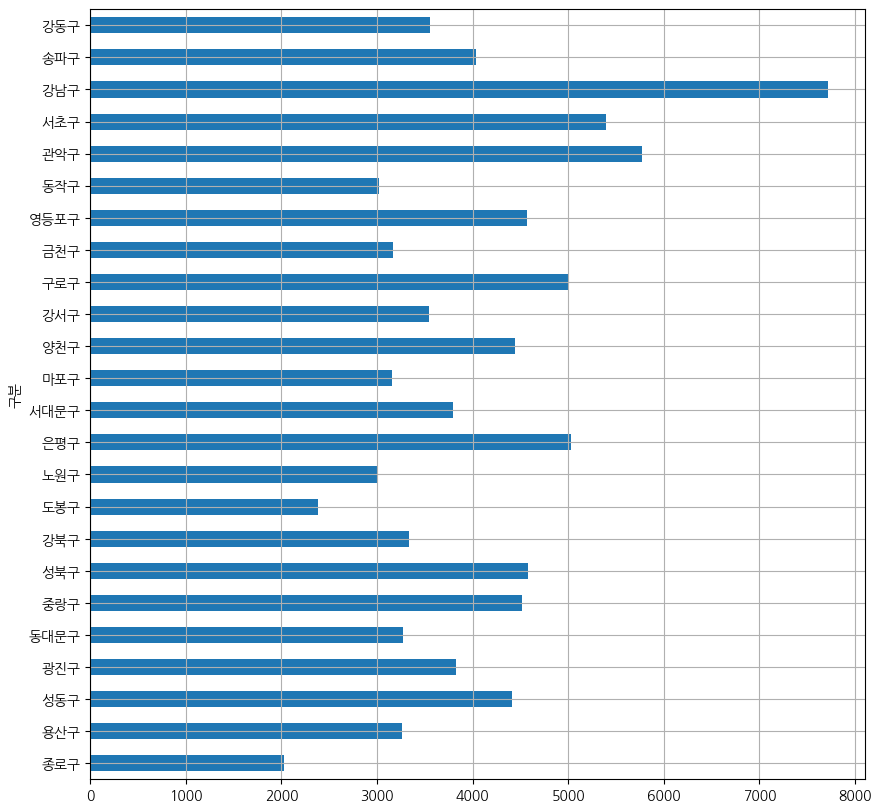

In [ ]:
data_result['총계'].plot(kind='barh', grid=True, figsize=(10, 10))

- 정렬

In [ ]:
def drawGraph6():
    data_result['총계'].sort_values().plot(
        kind='barh', grid=True, 
        title='가장 CCTV가 많은 구', 
        figsize=(10, 10))

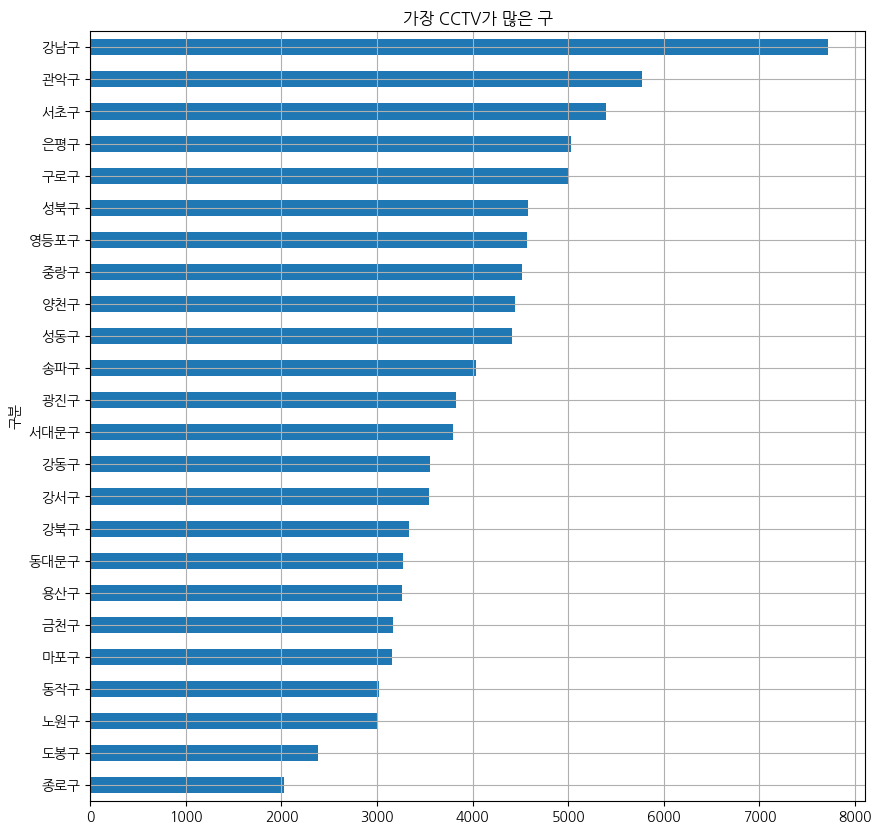

In [ ]:
drawGraph6()

### 데이터 경향 분석

In [ ]:
def drawGraph7():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['총계'], s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

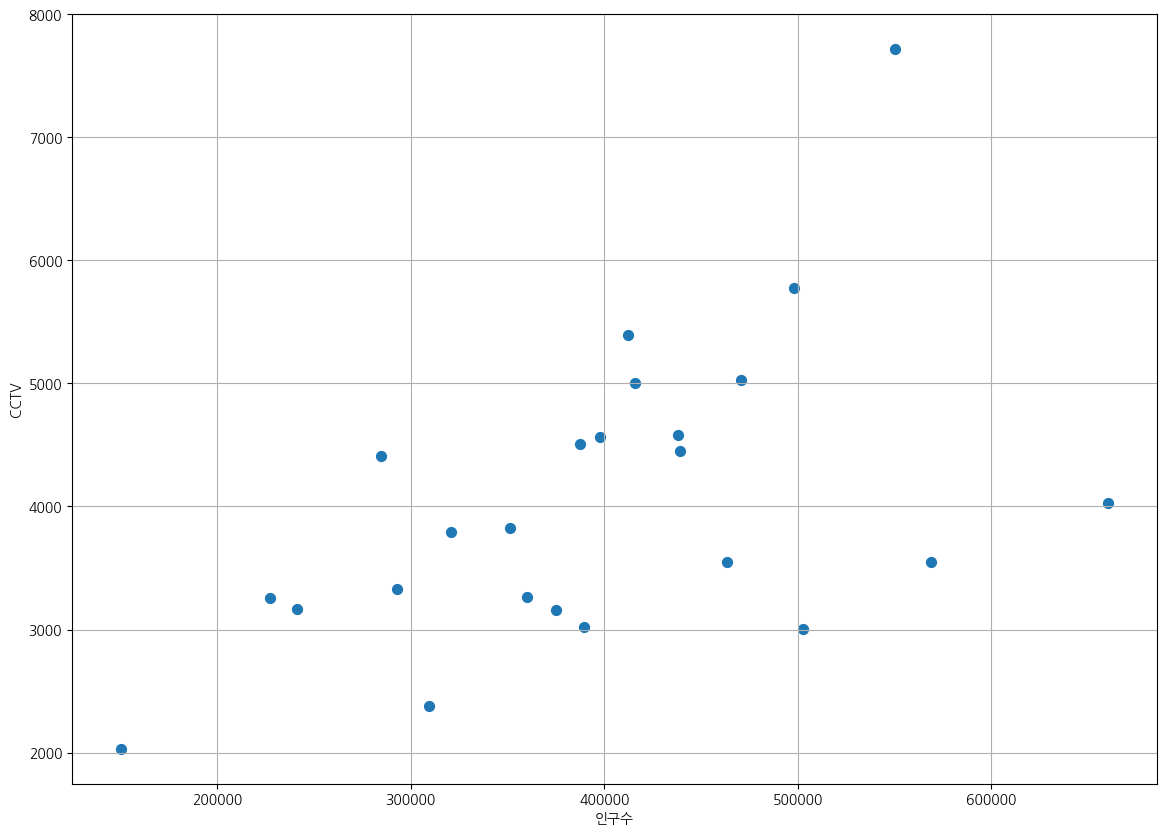

In [ ]:
drawGraph7()

- 데이터를 간단하게 표현하는 1차원 직선 그래프 생성
  - 기울기, bias

In [ ]:
fp1 = np.polyfit(data_result['인구수'], data_result['총계'], 1)
fp1

array([5.38244525e-03, 1.90108586e+03])

- np.poly1d()
  - 직선 함수화

In [ ]:
f1 = np.poly1d(fp1)

In [ ]:
f1(400000)

np.float64(4054.06396305776)

- 그래프 그리기

In [ ]:
# 함수에 입력할 연속 데이터 생성 (100000 부터 700000 까지를 100등분 하는 linear space 생성)
fx = np.linspace(100000, 700000, 100)

In [ ]:
def drawGraph8():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['총계'], s=50)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

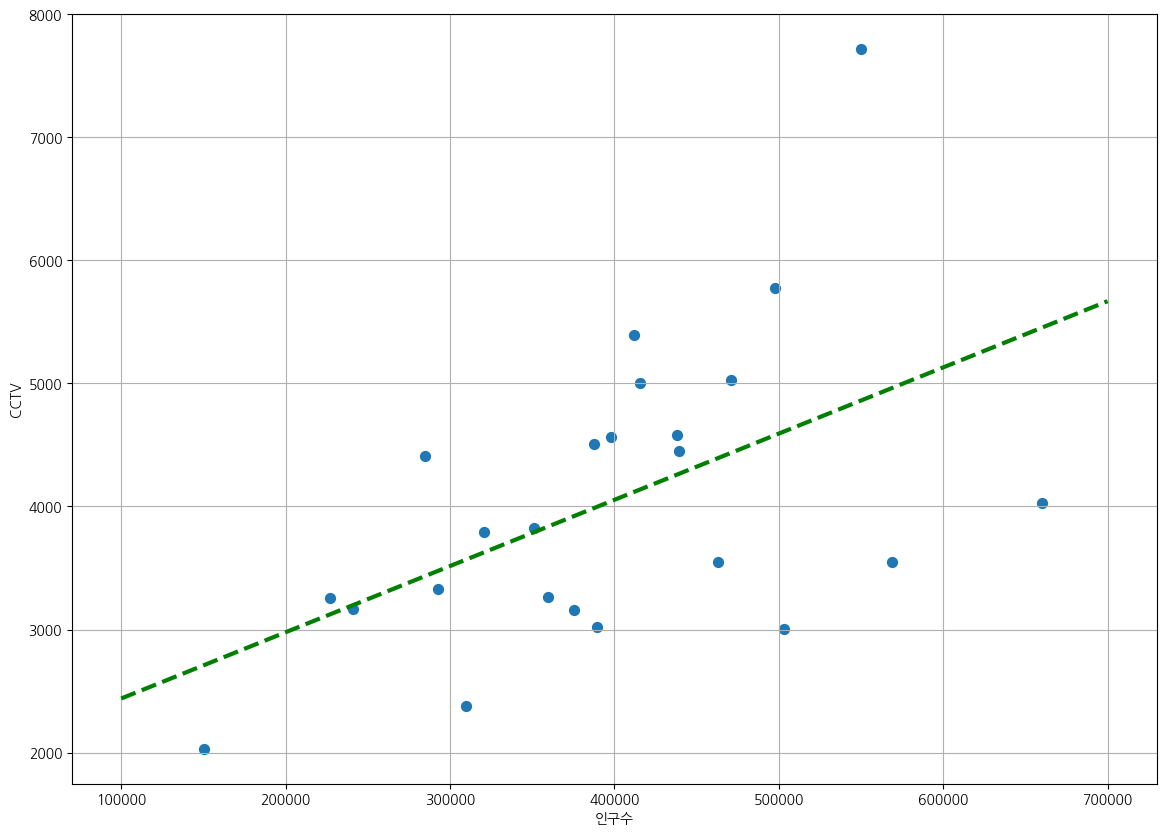

In [ ]:
drawGraph8()

### 데이터 결과 분석 및 저장

In [ ]:
data_result['오차'] = data_result['총계'] - f1(data_result['인구수'])

In [ ]:
df_descending = data_result.sort_values(by='오차', ascending=False)
df_ascending = data_result.sort_values(by='오차', ascending=True)

In [ ]:
df_descending.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio,오차
구분,,,,,,,,,,
강남구,7721,24.894856,550282,544873,5409,86606,0.982951,15.738476,1.403099,2858.051400
서초구,5395,54.363376,412078,407664,4414,65661,1.071156,15.934119,1.309218,1275.926863
관악구,5772,29.446064,497883,481956,15927,85418,3.198944,17.156240,1.159309,1191.086149
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289,975.176733
구로구,5003,42.902028,415651,392405,23246,79984,5.592673,19.243067,1.203654,864.695386


In [ ]:
df_ascending.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio,오차
구분,,,,,,,,,,
노원구,3006,50.676692,502925,498213,4712,96422,0.936919,19.172242,0.597703,-1602.052140
송파구,4031,56.726283,660025,654166,5859,108894,0.887694,16.498466,0.610734,-1422.634289
강서구,3546,64.471243,568826,563058,5768,102096,1.014018,17.948547,0.623389,-1416.760664
도봉구,2378,291.118421,309494,306948,2546,70436,0.822633,22.758438,0.768351,-1188.920373
동작구,3024,36.400541,389714,378769,10945,70474,2.808470,18.083518,0.775954,-974.700131


In [ ]:
from matplotlib.colors import ListedColormap

# Hex color code 검색 후 사용
color_step = ["#ff2d00", "#ff9e00", "#9f00ff", "#67ff00", "#0018ff"]
my_colormap = ListedColormap(color_step)

In [ ]:
import matplotlib.cm as cm
def drawGraph9():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['총계'], c=data_result['오차'],
                s=50, cmap=my_colormap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='gray')

    for n in range(5):
        # 데이터에 대한 설명을 할 때, 점과 글자가 겹치지 않도록 글자의 위치를 약간 수정하는 과정
        plt.text(df_descending['인구수'].iloc[n]*1.02,
                 df_descending['총계'].iloc[n]*0.98,
                 df_descending.index[n], fontsize=15)
        plt.text(df_ascending['인구수'].iloc[n]*1.02,
                 df_ascending['총계'].iloc[n]*0.98,
                 df_ascending.index[n], fontsize=15)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.colorbar()
    plt.grid()
    plt.show()

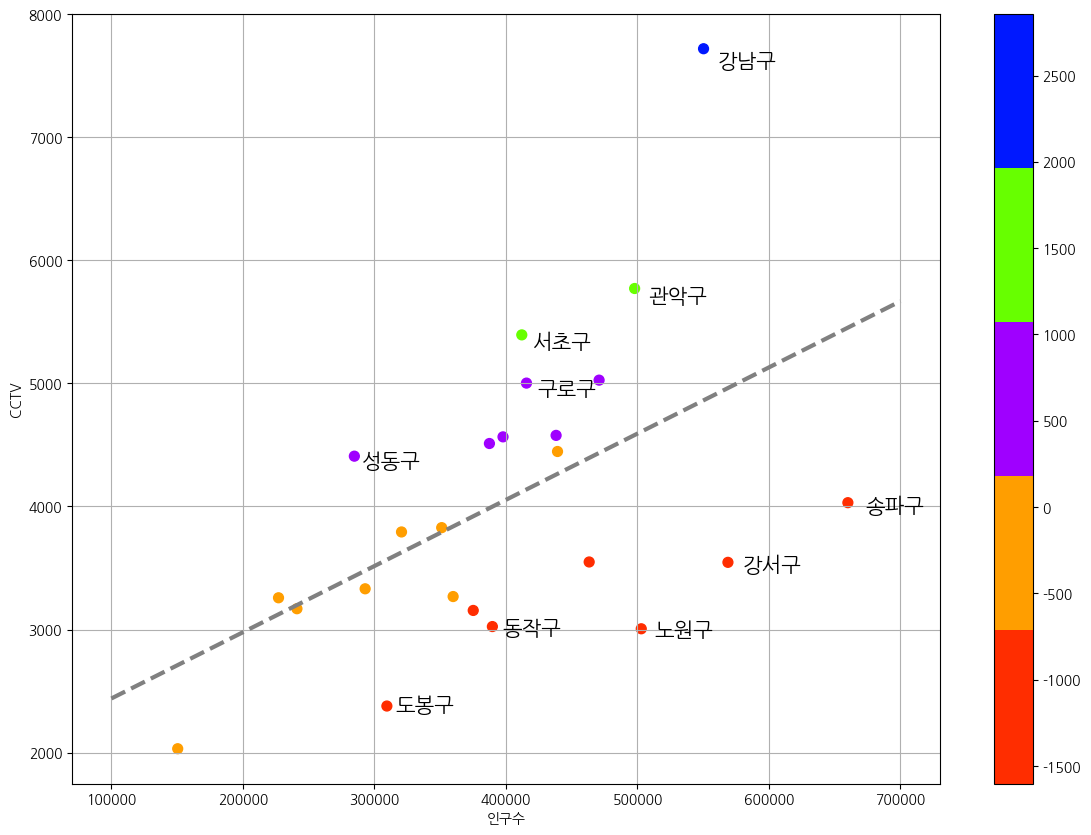

In [ ]:
drawGraph9()

In [ ]:
data_result.to_csv('./../data/CCTV_result.csv', sep=',', encoding='utf-8')

---